<a href="https://colab.research.google.com/github/hasune613/hello-world/blob/main/BERT_fetch_20newsgroups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd


In [74]:
# data = fetch_20newsgroups()
# dir(data)
train_data = fetch_20newsgroups(subset = 'train')
valid_data = fetch_20newsgroups(subset = 'test')


In [75]:
dir(train_data)
    

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [76]:
train = pd.DataFrame({'text' : train_data.data, 'target' : train_data.target})
valid = pd.DataFrame({'text' : valid_data.data, 'target' : valid_data.target})
print(train.shape, valid.shape)
train.head()

(11314, 2) (7532, 2)


,text,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [77]:
text = train.text.values[0]
text

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [78]:
target = train.target.values[0]
target

7

In [79]:
print(train_data.target_names)
print(train_data.target_names[7])

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
rec.autos


In [80]:
text #train.text.values[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [81]:
import re
def cleaning(text):
    text = re.sub('\n',' ',text) 
    text = re.sub('[^A-Za-z0-9]', ' ', text)
    text = re.sub('[" "]', ' ',text)
    return text.lower()

In [82]:
train['cleaning_text']  = train.text.map(cleaning)
valid['cleaning_text']  = valid.text.map(cleaning)

In [83]:
train['cleaning_text'][0]


'from  lerxst wam umd edu  where s my thing  subject  what car is this   nntp posting host  rac3 wam umd edu organization  university of maryland  college park lines  15   i was wondering if anyone out there could enlighten me on this car i saw the other day  it was a 2 door sports car  looked to be from the late 60s  early 70s  it was called a bricklin  the doors were really small  in addition  the front bumper was separate from the rest of the body  this is  all i know  if anyone can tellme a model name  engine specs  years of production  where this car is made  history  or whatever info you have on this funky looking car  please e mail   thanks    il         brought to you by your neighborhood lerxst          '

In [84]:
import torch
from torch.utils.data import Dataset, DataLoader


In [85]:
class Data(Dataset):
    def __init__(self, data):
        super().__init__()
        self.data = data

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        text = self.data['cleaning_text'][idx]
        label =  self.data['target'][idx]
        return text, torch.tensor(label, dtype=torch.float)

In [86]:
ds = Data(train)
print(ds[0])
print(ds[0][0])
print(ds[0][1])

('from  lerxst wam umd edu  where s my thing  subject  what car is this   nntp posting host  rac3 wam umd edu organization  university of maryland  college park lines  15   i was wondering if anyone out there could enlighten me on this car i saw the other day  it was a 2 door sports car  looked to be from the late 60s  early 70s  it was called a bricklin  the doors were really small  in addition  the front bumper was separate from the rest of the body  this is  all i know  if anyone can tellme a model name  engine specs  years of production  where this car is made  history  or whatever info you have on this funky looking car  please e mail   thanks    il         brought to you by your neighborhood lerxst          ', tensor(7.))
from  lerxst wam umd edu  where s my thing  subject  what car is this   nntp posting host  rac3 wam umd edu organization  university of maryland  college park lines  15   i was wondering if anyone out there could enlighten me on this car i saw the other day  it 

In [87]:
dl = DataLoader(ds, batch_size = 4)
batch = next(iter(dl))
print(len(batch))
print(batch[0])
print(batch[1])

2
('from  lerxst wam umd edu  where s my thing  subject  what car is this   nntp posting host  rac3 wam umd edu organization  university of maryland  college park lines  15   i was wondering if anyone out there could enlighten me on this car i saw the other day  it was a 2 door sports car  looked to be from the late 60s  early 70s  it was called a bricklin  the doors were really small  in addition  the front bumper was separate from the rest of the body  this is  all i know  if anyone can tellme a model name  engine specs  years of production  where this car is made  history  or whatever info you have on this funky looking car  please e mail   thanks    il         brought to you by your neighborhood lerxst          ', 'from  guykuo carson u washington edu  guy kuo  subject  si clock poll   final call summary  final call for si clock reports keywords  si acceleration clock upgrade article i d   shelley 1qvfo9innc3s organization  university of washington lines  11 nntp posting host  cars

In [88]:
train_ds = Data(train)
valid_ds =Data(valid)


train_dl = DataLoader(train_ds, batch_size = 32, shuffle=True, drop_last=True)
valid_dl = DataLoader(valid_ds, batch_size = 32*2, shuffle=False, drop_last=False)


In [89]:
!pip -q install  transformers

In [90]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [91]:
text = train['cleaning_text'].values[0]
text

'from  lerxst wam umd edu  where s my thing  subject  what car is this   nntp posting host  rac3 wam umd edu organization  university of maryland  college park lines  15   i was wondering if anyone out there could enlighten me on this car i saw the other day  it was a 2 door sports car  looked to be from the late 60s  early 70s  it was called a bricklin  the doors were really small  in addition  the front bumper was separate from the rest of the body  this is  all i know  if anyone can tellme a model name  engine specs  years of production  where this car is made  history  or whatever info you have on this funky looking car  please e mail   thanks    il         brought to you by your neighborhood lerxst          '

In [92]:
encoded = tokenizer.encode_plus(text)
encoded


{'input_ids': [101, 2013, 3393, 2099, 2595, 3367, 11333, 2213, 8529, 2094, 3968, 2226, 2073, 1055, 2026, 2518, 3395, 2054, 2482, 2003, 2023, 1050, 3372, 2361, 14739, 3677, 10958, 2278, 2509, 11333, 2213, 8529, 2094, 3968, 2226, 3029, 2118, 1997, 5374, 2267, 2380, 3210, 2321, 1045, 2001, 6603, 2065, 3087, 2041, 2045, 2071, 4372, 7138, 2368, 2033, 2006, 2023, 2482, 1045, 2387, 1996, 2060, 2154, 2009, 2001, 1037, 1016, 2341, 2998, 2482, 2246, 2000, 2022, 2013, 1996, 2397, 20341, 2220, 17549, 2009, 2001, 2170, 1037, 5318, 4115, 1996, 4303, 2020, 2428, 2235, 1999, 2804, 1996, 2392, 21519, 2001, 3584, 2013, 1996, 2717, 1997, 1996, 2303, 2023, 2003, 2035, 1045, 2113, 2065, 3087, 2064, 2425, 4168, 1037, 2944, 2171, 3194, 28699, 2015, 2086, 1997, 2537, 2073, 2023, 2482, 2003, 2081, 2381, 2030, 3649, 18558, 2017, 2031, 2006, 2023, 24151, 2559, 2482, 3531, 1041, 5653, 4283, 6335, 2716, 2000, 2017, 2011, 2115, 5101, 3393, 2099, 2595, 3367, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [93]:
encoded.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [94]:
len(encoded['input_ids'])

154

In [95]:
import matplotlib.pyplot as plt


Token indices sequence length is longer than the specified maximum sequence length for this model (522 > 512). Running this sequence through the model will result in indexing errors


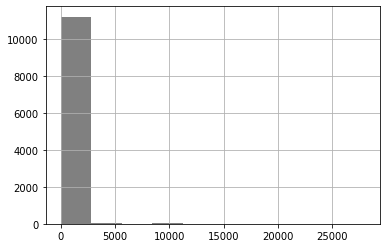

In [96]:
length = []

for text in train['cleaning_text'].values:
    encoded = tokenizer.encode_plus(text.lower())
    length.append(len(encoded['input_ids']))

plt.hist(length,color = 'gray')
plt.grid()
plt.show()


In [97]:
import numpy as np

length = np.array(length)
print(' 中央値 : ', np.quantile(length, q=0.5))
print(' 75％ : ', np.quantile(length, q=0.75))


 中央値 :  233.0
 75％ :  368.0


In [98]:
MAX_LEN = 256
encoded = tokenizer.encode_plus(text, padding='max_length', max_length=MAX_LEN,truncation=True)
print(len(encoded['input_ids']))
print(encoded['attention_mask'][:10])
print(encoded['attention_mask'][-10:])

256
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [99]:
print(tokenizer.decode(encoded['input_ids']))

[CLS] from gunning cco caltech edu kevin j gunning subject stolen cbr900rr organization california institute of technology pasadena lines 12 distribution usa nntp posting host alumni caltech edu summary see above stolen from pasadena between 4 30 and 6 30 pm on 4 15 blue and white honda cbr900rr california plate kg cbr serial number jh2sc281xpm100187 engine number 2101240 no turn signals or mirrors lights taped over for track riders session at willow springs tomorrow guess i ll miss it help me find my baby kjg [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD

In [100]:
from torch import nn
from transformers import AutoModel

In [101]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = AutoModel.from_pretrained("bert-base-uncased")
        self.classifier = nn.Linear(in_features = 768, out_features = 20)
    
    def forward(self, input_ids, attention_mask, token_type_ids):
        outputs = self.bert(input_ids = input_ids, attention_mask = attention_mask, token_type_ids = token_type_ids)
        pooler_output = outputs.pooler_output
        logits = self.classifier(pooler_output).squeeze(-1)
        return logits

In [103]:
model = Model()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [104]:
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [107]:
model.train() # 学習モード
train_loss = 0
for batch in train_dl:
    optimizer.zero_grad() 
    text = batch[0] # 文章
    label = batch[1].long().cuda() # 正解ラベル

    # tokenizer.batch_encode_plus -> 複数の文を一度に処理したいとき
    encoded = tokenizer.batch_encode_plus(
        list(text), padding = "max_length", max_length = MAX_LEN, truncation = True,
        return_tensors = "pt", return_attention_mask = True, return_token_type_ids = True
        ) # バッチごと変換する。文章はリストに入れる必要あり。

    input_ids = encoded["input_ids"].cuda()
    attention_mask = encoded["attention_mask"].cuda()
    token_type_ids = encoded["token_type_ids"].cuda()
    preds = model(input_ids, attention_mask, token_type_ids) # 予測
    loss = criterion(preds, label) # 損失計算
    loss.backward() 
    optimizer.step() 
    train_loss += loss.item()
train_loss /= len(train_dl)
print(train_loss)

In [ ]:
model.eval()
valid_loss = 0
with torch.no_grad():
    for batch in valid_dl():
        text = batch[0]
        label = batch[1].long().cuda()
        encoded = tokenizer.batch_encod_plus(
            list(text), padding='max_length', max_length= MAX_LEN,truncation=True,
            return_tensors = 'pt', return_attention_mask = True, return_token_type_ids = True
            )
        input_ids = encoded['input_ids'].cuda()
        attention_mask = encoded['attention_mask'].cuda()
        token_type_ids = encoded['token_type_ids'].cuda()
        
        preds = model(input_ids,attention_mask,token_type_ids)
        loss = criterion(preds, label)
        valid_loss += loss.item()
    valid_loss /= len(valid_dl)

print(valid_loss)

In [ ]:
# 実際には繰り返す

model = Model()
optimizer = toch.optim.Adam(model.parameters(), lr=1e=4)
criterion = nn.CrossEntropyLoss()

best_loss = np.inf
for epoch in range(5):
    model.train()
    train_loss = 0

    for batch in train_dl:
        text = batch[0]
        label = batch[1].long().cuda()
        encoded = torch.batch_encode_plus(
            list(text), padding='max_length', 
            max_length=MAX_LEN,truncation=True,return_tensors='pt',
            return_mask=True,return_token_type_ids=True
        )
        input_ids =encoded['input_ids'].cuda()
        attention_mask = encoded['attention_mask'].cuda()
        token_type_ids = encoded['token_type_ids'].cuda()
        preds = model(input_ids, attention_mask,token_type_ids)
        loss = criterion(preds, label)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_dl)

    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for batch in valid_dl:
            text = batch[0]
            label = batch[1].long().cuda()
            encoded = torch.batch_encode_plus(
                list(text), padding = 'max_length',
                max_length = MAX_LEN, truncation=True, return_tensors='pt',
                return_mask=True, return_token_type_ids=True
            )
            input_ids = encoded['input_ids'].cuda()
            attention_mask = encoded['attention_mask'].cuda()
            token_type_ids = encoded['token_type_ids'].cuda()
            preds = model(input_ids, attention_mask, token_type_ids)
            loss = criterion(preds, label)
            valid_loss += loss.item()
        valid_loss /= len(valid_dl)

    print(f'EPOCH[{epoch+1}]')
    print(train_loss)
    print(valid_loss)
    if valid_loss < best_loss:
        best_loss = valid_loss
        torch.save(model.state_dict(), 'bert.pth')
        print('saved ...')

In [ ]:
model.load_state_dict(torch.load('bert.pth',map_location='cpu'))

model.eval()
oof = []

with torch.no_grad():
    for batch in valid_dl:
        text = batch[0]
        encoded = tokenizer.batch_encode_plus(
            list(text), padding = 'max_length', max_length=MAX_LEN,
            truncation = True,return_tensors = 'pt', 
            return_attention_mask=True, return_token_type_ids = True)
        input_ids = encoded['input_ids'].cuda()
        attention_mask = encoded['attention_mask'].cuda()
        token_type_ids = encoded['token_type_ids'].cuda()
        preds = model(input_ids, attention_mask, token_type_ids)
        oof.append(preds.cpu().numpy())# 予測結果を入れる
oof = np.concatenate(oof, axis = 0) # 予測結果を１次元にまとめる

In [ ]:
print(oof.argmax(axis = 1)[:20])
print('=' *100)
print(valid['torget'].values[:20])

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(valid['target'], oof.argmax(axis = 1))
print(acc)